In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing

In [2]:
financials_raw = pd.read_excel('../Given_Data/NBA_financial_data.xlsx')
financials_raw.head()

,City,State,Team Name,Arena Sponsor,Arena Cost (millions),Year of Arena Construction,Arena Capacity,Jersey Sponsor,022/2023 Revenue (millions),022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue
0,Atlanta,Georgia,Atlanta Hawks,State Farm,213.5,1999,16600,YMCA,326,85,159,45.3
1,Boston,Massachusetts,Boston Celtics,TD Bank,160.0,1995,19156,Vistaprint,443,88,185,72.5
2,Brooklyn,New York,Brooklyn Nets,Barclays Bank,1000.0,2012,17732,Webull,367,-5,187,55.1
3,Charlotte,North Carolina,Charlotte Hornets,Spectrum,260.0,2005,19077,Feastables,269,35,165,23.7
4,Chicago,Illinois,Chicago Bulls,United Airlines,175.0,1994,20917,Motorola,372,115,158,70.0


In [3]:
# drop unnecessary columns
financials = financials_raw.drop(columns= ['Arena Sponsor', 'Jersey Sponsor'])
financials.head()

,City,State,Team Name,Arena Cost (millions),Year of Arena Construction,Arena Capacity,022/2023 Revenue (millions),022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue
0,Atlanta,Georgia,Atlanta Hawks,213.5,1999,16600,326,85,159,45.3
1,Boston,Massachusetts,Boston Celtics,160.0,1995,19156,443,88,185,72.5
2,Brooklyn,New York,Brooklyn Nets,1000.0,2012,17732,367,-5,187,55.1
3,Charlotte,North Carolina,Charlotte Hornets,260.0,2005,19077,269,35,165,23.7
4,Chicago,Illinois,Chicago Bulls,175.0,1994,20917,372,115,158,70.0


In [4]:
financials.columns

Index(['City', 'State', 'Team Name', 'Arena Cost (millions)',
       'Year of Arena Construction', 'Arena Capacity',
       '022/2023 Revenue (millions)', '022/2023 Operating Income (millions)',
       '022/2023 Player Expenses (millions)', '2019 Ticket Revenue'],
      dtype='object')

In [5]:
# financials.rename(columns= {'Arena Cost (millions)': 'Arena Cost', '022/2023 Revenue (millions)': 'Revenue', 
#                             '022/2023 Operating Income (millions)': 'Operating Income', '022/2023 Player Expenses (millions)': 'Player Expenses'}, inplace=True)

In [6]:
financials.columns

Index(['City', 'State', 'Team Name', 'Arena Cost (millions)',
       'Year of Arena Construction', 'Arena Capacity',
       '022/2023 Revenue (millions)', '022/2023 Operating Income (millions)',
       '022/2023 Player Expenses (millions)', '2019 Ticket Revenue'],
      dtype='object')

In [7]:
financials.describe()

,Arena Cost (millions),Year of Arena Construction,Arena Capacity,022/2023 Revenue (millions),022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,348.860000,2000.433333,18770.866667,352.800000,70.600000,159.600000,55.883333
std,335.561575,10.088174,1114.832838,105.469525,45.844264,20.856819,23.304596
min,89.000000,1968.000000,16600.000000,258.000000,-36.000000,110.000000,21.300000
25%,163.750000,1995.250000,17956.000000,274.000000,47.500000,154.000000,38.150000
50%,224.250000,1999.000000,18987.500000,327.500000,73.000000,158.000000,55.600000
75%,375.000000,2003.750000,19500.250000,371.750000,87.250000,175.500000,65.925000
max,1400.000000,2019.000000,20917.000000,765.000000,169.000000,198.000000,116.800000


In [8]:
# Constructing the independent variables
independent_vars = ['Arena Cost (millions)', 'Arena Capacity', '022/2023 Operating Income (millions)', '022/2023 Player Expenses (millions)', '2019 Ticket Revenue']
# Adding a constant term for the intercept
constant = sm.add_constant(financials[independent_vars])

# Independent variables
X = financials[['intercept'] + independent_vars]
# Dependent variable
y = financials['022/2023 Revenue (millions)']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


KeyError: "['intercept'] not in index"

In [ ]:
sns.pairplot(financials.loc[:, ['022/2023 Revenue (millions)', 'Arena Cost (millions)', 'Arena Capacity', '022/2023 Operating Income (millions)', '022/2023 Player Expenses (millions)', '2019 Ticket Revenue']])

In [9]:
# Constructing the independent variables
independent_vars = ['Arena Cost (millions)', '022/2023 Operating Income (millions)', '022/2023 Player Expenses (millions)', '2019 Ticket Revenue']
# Adding a constant term for the intercept
constant = sm.add_constant(financials[independent_vars])

# Independent variables
X = financials[['intercept'] + independent_vars]
# Dependent variable
y = financials['022/2023 Revenue (millions)']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


KeyError: "['intercept'] not in index"

In [10]:
# import statsmodels.api as sm

# # Constructing the independent variables
# independent_vars = ['Arena Cost', 'Arena Capacity', 'Operating Income', 'Player Expenses', '2019 Ticket Revenue']

# # Adding a constant term for the intercept
# financials['intercept'] = 1

# # Independent variables
# X = financials[['intercept'] + independent_vars]

# # Dependent variable
# y = financials['Revenue']

# # Fit the model
# model = sm.OLS(y, X).fit()

# # Print summary statistics
# print(model.summary())


In [11]:
financials['log_Revenue'] = np.log(financials['022/2023 Revenue (millions)'])

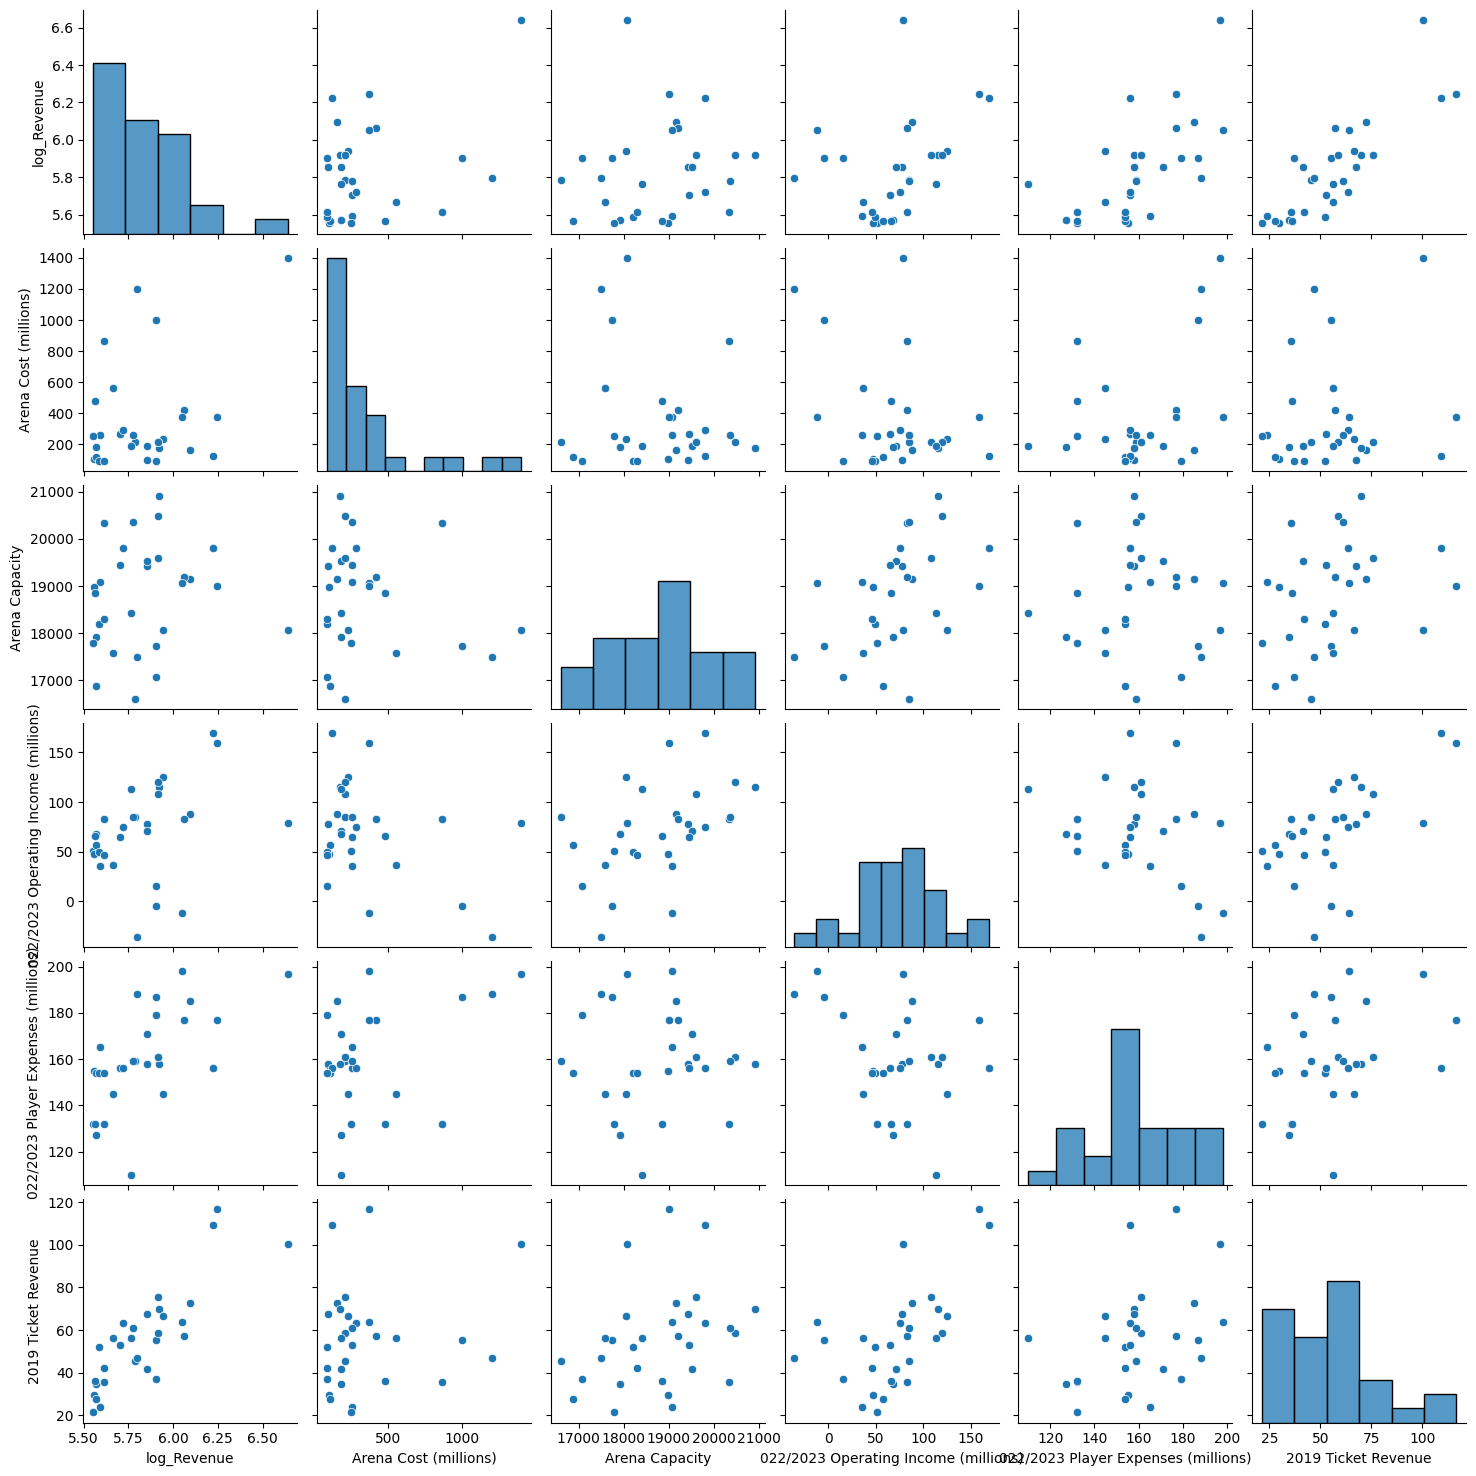

In [12]:
vars = ['log_Revenue', 'Arena Cost (millions)', 'Arena Capacity', '022/2023 Operating Income (millions)', '022/2023 Player Expenses (millions)', '2019 Ticket Revenue']
sns.pairplot(financials.loc[:, vars])

In [13]:
# Standardize variables using StandardScaler function
scaler = preprocessing.StandardScaler().fit(financials[vars])
financials_scaled = scaler.transform(financials[vars])

# Convert to dataframe
financials_scaled_df = pd.DataFrame(financials_scaled, columns=financials[vars].columns)
financials_scaled_df.describe()

,log_Revenue,Arena Cost (millions),Arena Capacity,022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-5.469699e-15,1.443290e-16,1.539509e-15,1.498801e-16,2.826443e-16,-1.942890e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.129188e+00,-7.876419e-01,-1.980546e+00,-2.365015e+00,-2.418774e+00,-1.509339e+00
25%,-8.857489e-01,-5.610729e-01,-7.434272e-01,-5.124938e-01,-2.730874e-01,-7.739456e-01
50%,-1.641560e-01,-3.776959e-01,1.976411e-01,5.324611e-02,-7.802496e-02,-1.236567e-02
75%,3.486412e-01,7.923097e-02,6.654382e-01,3.693949e-01,7.753730e-01,4.382540e-01
max,3.268420e+00,3.186031e+00,1.957981e+00,2.183090e+00,1.872599e+00,2.658619e+00


In [14]:
city_data_raw = pd.read_excel('../Given_Data/us_city_data.xlsx')
city_data_raw.head()

,city,city_ascii,city_alt,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,...,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_fips,cbsa_name,cbsa_metro,csa_fips,csa_name
0,New York,New York,NaN,NY,New York,36081,Queens,36081|36047|36085|36005|36061,Queens|Kings|Richmond|Bronx|New York,40.6943,...,17.2,13.9,41.1,6.7,2.0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",True,408.0,"New York-Newark, NY-NJ-CT-PA"
1,Los Angeles,Los Angeles,NaN,CA,California,6037,Los Angeles,6037,Los Angeles,34.1141,...,16.6,13.7,31.3,10.6,2.3,31080.0,"Los Angeles-Long Beach-Anaheim, CA",True,348.0,"Los Angeles-Long Beach, CA"
2,Chicago,Chicago,NaN,IL,Illinois,17031,Cook,17031|17043,Cook|DuPage,41.8375,...,16.9,7.9,34.1,9.8,2.9,16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",True,176.0,"Chicago-Naperville, IL-IN-WI"
3,Miami,Miami,NaN,FL,Florida,12086,Miami-Dade,12086,Miami-Dade,25.7840,...,20.0,29.9,28.2,19.0,2.0,33100.0,"Miami-Fort Lauderdale-Pompano Beach, FL",True,370.0,"Miami-Port St. Lucie-Fort Lauderdale, FL"
4,Houston,Houston,NaN,TX,Texas,48201,Harris,48201|48157|48339,Harris|Fort Bend|Montgomery,29.7860,...,19.6,13.5,27.4,24.2,3.6,26420.0,"Houston-The Woodlands-Sugar Land, TX",True,288.0,"Houston-The Woodlands, TX"


In [15]:
city_data_raw.columns

Index(['city', 'city_ascii', 'city_alt', 'state_id', 'state_name',
       'county_fips', 'county_name', 'county_fips_all', 'county_name_all',
       'lat', 'lng', 'population', 'population_proper', 'density', 'source',
       'military', 'incorporated', 'cdp', 'township', 'timezone', 'ranking',
       'zips', 'id', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'age_over_65', 'age_18_to_24', 'age_over_18', 'male', 'female',
       'married', 'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_househol

In [16]:
# drop unnecessary columns
city_data = city_data_raw.drop(columns= ['city_ascii', 'city_alt'])

In [17]:
country_data_raw = pd.read_excel('../Given_Data/world_country_data.xlsx')
country_data_raw.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,0.581,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,0.784,0.28,38041754.0,0.489,0.093,0.714,0.1112,9797273.0,33.939110,67.709953
1,Albania,105,AL,0.431,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,0.569,1.20,2854191.0,0.557,0.186,0.366,0.1233,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,0.174,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,0.281,1.72,43053054.0,0.412,0.372,0.661,0.1170,31510100.0,28.033886,1.659626
3,Andorra,164,AD,0.400,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,0.364,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26,AO,0.475,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,0.334,0.21,31825295.0,0.775,0.092,0.491,0.0689,21061025.0,-11.202692,17.873887


In [18]:
# drop unnecessary columns
#country_data = country_data_raw.drop(columns= [])